In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [ ]:
algo1 = pd.read_csv('results/algo1.csv')
algo2 = pd.read_csv('results/algo2.csv')
optsol = pd.read_csv('results/optsol.csv')

In [2]:
algo1trees = pd.read_csv('results/algo1trees.csv')
algo2trees = pd.read_csv('results/algo2trees.csv')

all

In [48]:
results = pd.merge(algo1, algo2, how='outer')
results = pd.merge(results, optsol, how='outer')

In [49]:
results['input_size'] = results['input'].map(lambda x: x.count('-') + 1)
results['vertex_count'] = results['input'].map(lambda x: x.split('-')[0].count(',') + 1)

keywords = ['algo1', 'algo2', 'optsol']
for keyword in keywords:
    results[f'num_rel_{keyword}'] = results[f'output_{keyword}'].map(lambda x: x.count('('))
    if keyword != 'optsol':
        results[f'approx_{keyword}'] = results.apply(lambda x: x[f'cost_{keyword}']/x[f'cost_optsol'], axis=1)
        results[f'cost_diff_{keyword}'] = results.apply(lambda x: abs(x[f'cost_{keyword}'] - x[f'cost_optsol']), axis=1)

print(results.shape)
results.describe()

(2212, 18)


,cost_algo1,runtime_algo1,cost_algo2,runtime_algo2,cost_optsol,input_size,vertex_count,num_rel_algo1,approx_algo1,cost_diff_algo1,num_rel_algo2,approx_algo2,cost_diff_algo2,num_rel_optsol
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,6.867993,0.000465,14.522152,0.000662,4.836799,11.750452,3.971519,22.089060,1.407256,2.032098,74.110307,2.917041,9.685353,23.031193
std,2.831101,0.000419,9.328759,0.000972,1.553229,6.307019,0.166380,9.214845,0.434834,2.014951,44.493466,1.822529,8.705987,8.717716
min,1.000000,0.000034,1.000000,0.000023,1.000000,1.000000,3.000000,2.000000,0.875000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,5.000000,0.000161,6.000000,0.000147,4.000000,6.000000,4.000000,15.000000,1.000000,0.000000,35.000000,1.500000,2.000000,18.000000
50%,7.000000,0.000447,13.000000,0.000383,5.000000,12.000000,4.000000,24.000000,1.285714,1.000000,70.000000,2.333333,7.000000,23.000000
75%,9.000000,0.000656,22.000000,0.001016,6.000000,17.000000,4.000000,30.000000,1.666667,4.000000,111.000000,4.000000,16.000000,29.000000
max,12.000000,0.007915,37.000000,0.030236,9.000000,24.000000,4.000000,39.000000,3.000000,8.000000,174.000000,9.250000,33.000000,53.000000


<AxesSubplot:xlabel='input_size', ylabel='runtime_algo2'>

<Figure size 432x288 with 0 Axes>

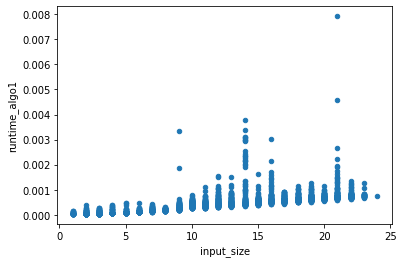

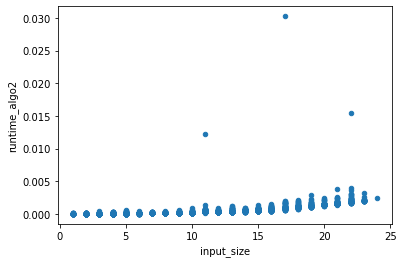

In [50]:
runtime = results[['input_size', 'runtime_algo1', 'runtime_algo2']]

plt.figure()
runtime.plot.scatter(x='input_size', y='runtime_algo1')
runtime.plot.scatter(x='input_size', y='runtime_algo2')

<AxesSubplot:xlabel='input_size', ylabel='cost_optsol'>

<Figure size 432x288 with 0 Axes>

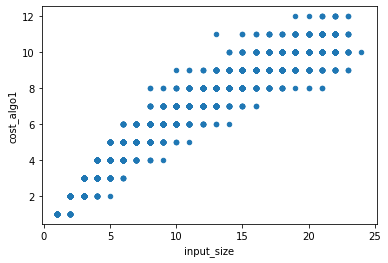

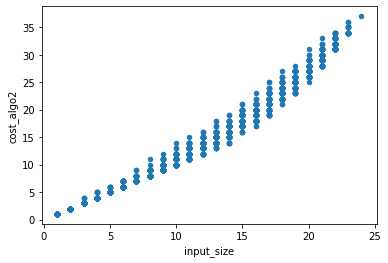

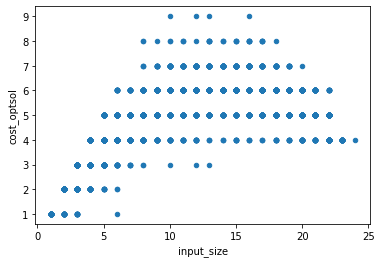

In [51]:
cost = results[['input_size', 'vertex_count', 'cost_algo1', 'cost_algo2', 'cost_optsol']]

plt.figure()
cost.plot.scatter(x='input_size', y='cost_algo1')
cost.plot.scatter(x='input_size', y='cost_algo2')
cost.plot.scatter(x='input_size', y='cost_optsol')

<AxesSubplot:xlabel='input_size', ylabel='num_rel_optsol'>

<Figure size 432x288 with 0 Axes>

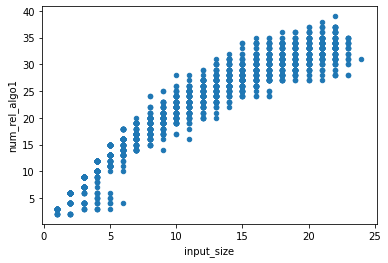

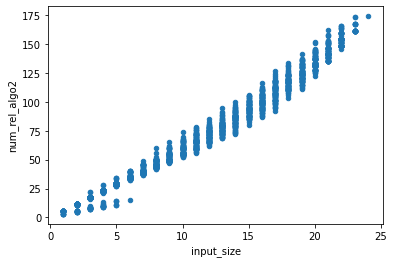

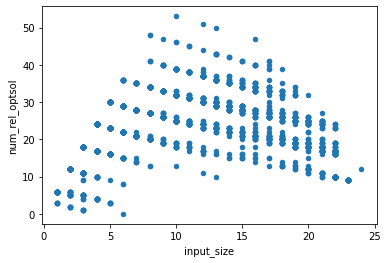

In [52]:
num_rel = results[['input_size', 'num_rel_algo1', 'num_rel_algo2', 'num_rel_optsol']]

plt.figure()
num_rel.plot.scatter(x='input_size', y='num_rel_algo1')
num_rel.plot.scatter(x='input_size', y='num_rel_algo2')
num_rel.plot.scatter(x='input_size', y='num_rel_optsol')

In [26]:
optapprox1 = results[results['cost_diff_algo1'] == 0]
optapprox1 = optapprox1[['input', 'output_algo1']]
print(optapprox1.shape)
optapprox1

(43, 2)


,input,output_algo1
0,"[1, 2, 3]","['[(1, 2), (2, 3)]']"
1,"[1, 3, 2]","['[(1, 3), (3, 2)]']"
2,"[2, 1, 3]","['[(1, 3), (2, 1)]']"
3,"[2, 3, 1]","['[(2, 3), (3, 1)]']"
4,"[3, 1, 2]","['[(1, 2), (3, 1)]']"
5,"[3, 2, 1]","['[(2, 1), (3, 2)]']"
6,"[1, 2, 3]-[1, 3, 2]","['[(1, 2), (1, 3)]']"
7,"[1, 2, 3]-[2, 1, 3]","['[(1, 3), (2, 3)]']"
8,"[1, 2, 3]-[2, 3, 1]","['[(1, 2), (2, 3)]', '[(2, 3), (3, 1)]']"
9,"[1, 2, 3]-[3, 1, 2]","['[(1, 2), (2, 3)]', '[(1, 2), (3, 1)]']"


In [35]:
notoptapprox1 = results[results['cost_diff_algo1'] != 0]
notoptapprox1 = notoptapprox1[['input', 'cost_diff_algo1', 'cost_algo1']]
print(notoptapprox1.describe())
notoptapprox1

(20, 3)
       cost_diff_algo1  cost_algo1
count        20.000000   20.000000
mean          1.050000    2.700000
std           0.223607    0.470162
min           1.000000    2.000000
25%           1.000000    2.000000
50%           1.000000    3.000000
75%           1.000000    3.000000
max           2.000000    3.000000


,input,cost_diff_algo1,cost_algo1
21,"[1, 2, 3]-[1, 3, 2]-[2, 1, 3]",1,2
23,"[1, 2, 3]-[1, 3, 2]-[3, 1, 2]",1,2
25,"[1, 2, 3]-[2, 1, 3]-[2, 3, 1]",1,2
36,"[1, 3, 2]-[3, 1, 2]-[3, 2, 1]",1,2
38,"[2, 1, 3]-[2, 3, 1]-[3, 2, 1]",1,2
40,"[2, 3, 1]-[3, 1, 2]-[3, 2, 1]",1,2
43,"[1, 2, 3]-[1, 3, 2]-[2, 1, 3]-[3, 2, 1]",1,3
44,"[1, 2, 3]-[1, 3, 2]-[2, 3, 1]-[3, 1, 2]",1,3
46,"[1, 2, 3]-[1, 3, 2]-[3, 1, 2]-[3, 2, 1]",1,3
47,"[1, 2, 3]-[2, 1, 3]-[2, 3, 1]-[3, 1, 2]",1,3


In [24]:
optapprox2 = results[results['cost_diff_algo2'] == 0]
optapprox2 = optapprox2[['input', 'output_algo2']]
print(optapprox2.shape)
optapprox2

(17, 2)


,input,output_algo2
0,"[1, 2, 3]","['[(1, 2), (1, 3), (2, 3)]']"
1,"[1, 3, 2]","['[(1, 2), (1, 3), (3, 2)]']"
2,"[2, 1, 3]","['[(1, 3), (2, 1), (2, 3)]']"
3,"[2, 3, 1]","['[(2, 1), (2, 3), (3, 1)]']"
4,"[3, 1, 2]","['[(1, 2), (3, 1), (3, 2)]']"
5,"[3, 2, 1]","['[(2, 1), (3, 1), (3, 2)]']"
8,"[1, 2, 3]-[2, 3, 1]","['[(1, 2), (1, 3), (2, 3)]', '[(2, 1), (2, 3), (3, 1)]']"
9,"[1, 2, 3]-[3, 1, 2]","['[(1, 2), (1, 3), (2, 3)]', '[(1, 2), (3, 1), (3, 2)]']"
10,"[1, 2, 3]-[3, 2, 1]","['[(1, 2), (1, 3), (2, 3)]', '[(2, 1), (3, 1), (3, 2)]']"
11,"[1, 3, 2]-[2, 1, 3]","['[(1, 2), (1, 3), (3, 2)]', '[(1, 3), (2, 1), (2, 3)]']"


In [37]:
notoptapprox2 = results[results['cost_diff_algo2'] != 0]
notoptapprox2 = notoptapprox2[['input', 'cost_diff_algo2', 'cost_algo2']]
print(notoptapprox2.describe())
notoptapprox2

       cost_diff_algo2  cost_algo2
count        46.000000   46.000000
mean          1.978261    3.695652
std           1.085032    1.190137
min           1.000000    2.000000
25%           1.000000    3.000000
50%           2.000000    3.500000
75%           2.000000    4.000000
max           6.000000    7.000000


,input,cost_diff_algo2,cost_algo2
6,"[1, 2, 3]-[1, 3, 2]",1,2
7,"[1, 2, 3]-[2, 1, 3]",1,2
13,"[1, 3, 2]-[3, 1, 2]",1,2
15,"[2, 1, 3]-[2, 3, 1]",1,2
19,"[2, 3, 1]-[3, 2, 1]",1,2
20,"[3, 1, 2]-[3, 2, 1]",1,2
21,"[1, 2, 3]-[1, 3, 2]-[2, 1, 3]",3,4
22,"[1, 2, 3]-[1, 3, 2]-[2, 3, 1]",1,3
23,"[1, 2, 3]-[1, 3, 2]-[3, 1, 2]",2,3
24,"[1, 2, 3]-[1, 3, 2]-[3, 2, 1]",1,3


In [38]:
optapprox = results[results['cost_algo1'] == results['cost_algo2']]
optapprox = optapprox[['input', 'output_algo1', 'output_algo2']]
print(optapprox.describe())
optapprox

            input          output_algo1                  output_algo2
count          17                    17                            17
unique         17                    17                            17
top     [1, 2, 3]  ['[(1, 2), (2, 3)]']  ['[(1, 2), (1, 3), (2, 3)]']
freq            1                     1                             1


,input,output_algo1,output_algo2
0,"[1, 2, 3]","['[(1, 2), (2, 3)]']","['[(1, 2), (1, 3), (2, 3)]']"
1,"[1, 3, 2]","['[(1, 3), (3, 2)]']","['[(1, 2), (1, 3), (3, 2)]']"
2,"[2, 1, 3]","['[(1, 3), (2, 1)]']","['[(1, 3), (2, 1), (2, 3)]']"
3,"[2, 3, 1]","['[(2, 3), (3, 1)]']","['[(2, 1), (2, 3), (3, 1)]']"
4,"[3, 1, 2]","['[(1, 2), (3, 1)]']","['[(1, 2), (3, 1), (3, 2)]']"
5,"[3, 2, 1]","['[(2, 1), (3, 2)]']","['[(2, 1), (3, 1), (3, 2)]']"
8,"[1, 2, 3]-[2, 3, 1]","['[(1, 2), (2, 3)]', '[(2, 3), (3, 1)]']","['[(1, 2), (1, 3), (2, 3)]', '[(2, 1), (2, 3), (3, 1)]']"
9,"[1, 2, 3]-[3, 1, 2]","['[(1, 2), (2, 3)]', '[(1, 2), (3, 1)]']","['[(1, 2), (1, 3), (2, 3)]', '[(1, 2), (3, 1), (3, 2)]']"
10,"[1, 2, 3]-[3, 2, 1]","['[(1, 2), (2, 3)]', '[(2, 1), (3, 2)]']","['[(1, 2), (1, 3), (2, 3)]', '[(2, 1), (3, 1), (3, 2)]']"
11,"[1, 3, 2]-[2, 1, 3]","['[(1, 3), (3, 2)]', '[(1, 3), (2, 1)]']","['[(1, 2), (1, 3), (3, 2)]', '[(1, 3), (2, 1), (2, 3)]']"


In [44]:
optapprox_joined = pd.merge(optapprox1, optapprox2, how='outer')
optapprox_joined

,input,output_algo1,output_algo2
0,"[1, 2, 3]","['[(1, 2), (2, 3)]']","['[(1, 2), (1, 3), (2, 3)]']"
1,"[1, 3, 2]","['[(1, 3), (3, 2)]']","['[(1, 2), (1, 3), (3, 2)]']"
2,"[2, 1, 3]","['[(1, 3), (2, 1)]']","['[(1, 3), (2, 1), (2, 3)]']"
3,"[2, 3, 1]","['[(2, 3), (3, 1)]']","['[(2, 1), (2, 3), (3, 1)]']"
4,"[3, 1, 2]","['[(1, 2), (3, 1)]']","['[(1, 2), (3, 1), (3, 2)]']"
5,"[3, 2, 1]","['[(2, 1), (3, 2)]']","['[(2, 1), (3, 1), (3, 2)]']"
6,"[1, 2, 3]-[1, 3, 2]","['[(1, 2), (1, 3)]']",NaN
7,"[1, 2, 3]-[2, 1, 3]","['[(1, 3), (2, 3)]']",NaN
8,"[1, 2, 3]-[2, 3, 1]","['[(1, 2), (2, 3)]', '[(2, 3), (3, 1)]']","['[(1, 2), (1, 3), (2, 3)]', '[(2, 1), (2, 3), (3, 1)]']"
9,"[1, 2, 3]-[3, 1, 2]","['[(1, 2), (2, 3)]', '[(1, 2), (3, 1)]']","['[(1, 2), (1, 3), (2, 3)]', '[(1, 2), (3, 1), (3, 2)]']"


trees

In [3]:
trees = pd.merge(algo1trees, algo2trees, how='outer')

In [5]:
trees['input_size'] = trees['input'].map(lambda x: x.count('-') + 1)
trees['vertex_count'] = trees['input'].map(lambda x: x.split('-')[0].count(',') + 1)

keywords = ['algo1', 'algo2']
for keyword in keywords:
    trees[f'num_rel_{keyword}'] = trees[f'output_{keyword}'].map(lambda x: x.count('('))
    trees[f'cost_diff_{keyword}'] = trees.apply(lambda x: abs(x[f'cost_{keyword}'] - 1), axis=1)

print(trees.shape)
trees.describe()

(10038, 13)


,cost_algo1,runtime_algo1,cost_algo2,runtime_algo2,input_size,vertex_count,num_rel_algo1,cost_diff_algo1,num_rel_algo2,cost_diff_algo2
count,10038.000000,10038.000000,10038.000000,10038.000000,10038.000000,10038.000000,10038.000000,10038.000000,10038.000000,10038.000000
mean,28.844591,0.010974,125.891811,0.094352,46.499103,5.924088,126.176928,27.844591,1627.934051,124.891811
std,22.097986,0.011869,117.558145,0.105536,38.090794,0.296799,94.929141,22.097986,1516.168104,117.558145
min,1.000000,0.000024,1.000000,0.000016,1.000000,3.000000,2.000000,0.000000,3.000000,0.000000
25%,11.000000,0.000770,23.000000,0.002102,15.000000,6.000000,51.000000,10.000000,312.000000,22.000000
50%,14.000000,0.001247,44.000000,0.005881,20.000000,6.000000,64.000000,13.000000,577.000000,43.000000
75%,54.000000,0.023644,256.000000,0.214098,90.000000,6.000000,234.000000,53.000000,3298.000000,255.000000
max,54.000000,0.061195,281.000000,0.244922,90.000000,6.000000,234.000000,53.000000,3661.000000,280.000000


In [29]:
trees_three = trees[trees['vertex_count'] == 3]
trees_three.describe()

,cost_algo1,runtime_algo1,cost_algo2,runtime_algo2,input_size,vertex_count,num_rel_algo1,cost_diff_algo1,num_rel_algo2,cost_diff_algo2
count,6.0,6.000000,6.0,6.000000,6.0,6.0,6.0,6.0,6.0,6.0
mean,1.0,0.000034,1.0,0.000039,1.0,3.0,2.0,0.0,3.0,0.0
std,0.0,0.000009,0.0,0.000013,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,0.000026,1.0,0.000023,1.0,3.0,2.0,0.0,3.0,0.0
25%,1.0,0.000028,1.0,0.000031,1.0,3.0,2.0,0.0,3.0,0.0
50%,1.0,0.000034,1.0,0.000036,1.0,3.0,2.0,0.0,3.0,0.0
75%,1.0,0.000036,1.0,0.000048,1.0,3.0,2.0,0.0,3.0,0.0
max,1.0,0.000049,1.0,0.000058,1.0,3.0,2.0,0.0,3.0,0.0


<AxesSubplot:xlabel='input_size', ylabel='runtime_algo2'>

<Figure size 432x288 with 0 Axes>

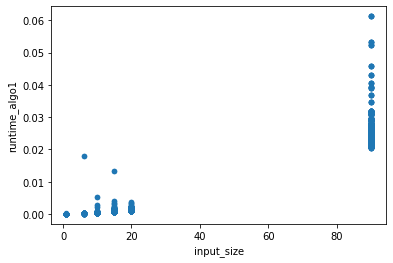

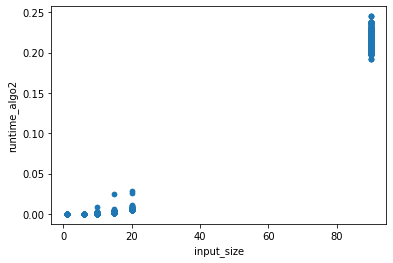

In [6]:
runtime = trees[['input_size', 'runtime_algo1', 'runtime_algo2']]

plt.figure()
runtime.plot.scatter(x='input_size', y='runtime_algo1')
runtime.plot.scatter(x='input_size', y='runtime_algo2')

<AxesSubplot:xlabel='vertex_count', ylabel='cost_algo2'>

<Figure size 432x288 with 0 Axes>

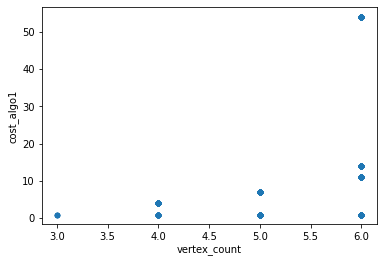

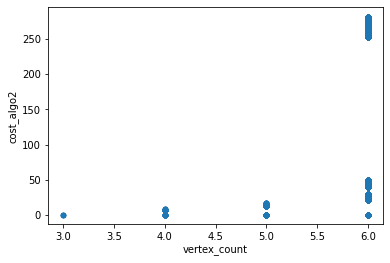

In [30]:
cost = trees[['input_size', 'vertex_count', 'cost_algo1', 'cost_algo2']]

plt.figure()
cost.plot.scatter(x='vertex_count', y='cost_algo1')
cost.plot.scatter(x='vertex_count', y='cost_algo2')

<AxesSubplot:xlabel='input_size', ylabel='num_rel_algo2'>

<Figure size 432x288 with 0 Axes>

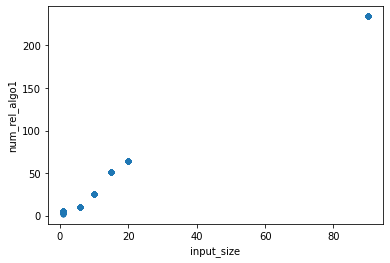

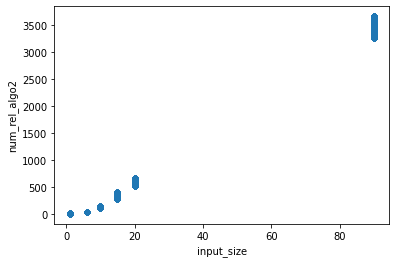

In [8]:
num_rel = trees[['input_size', 'num_rel_algo1', 'num_rel_algo2']]

plt.figure()
num_rel.plot.scatter(x='input_size', y='num_rel_algo1')
num_rel.plot.scatter(x='input_size', y='num_rel_algo2')

In [22]:
optapprox1 = trees[trees['cost_diff_algo1'] == 0]
optapprox1 = optapprox1[['input', 'runtime_algo1', 'num_rel_algo1', 'output_algo1']]
print(optapprox1.describe())
optapprox1

       runtime_algo1  num_rel_algo1
count     870.000000     870.000000
mean        0.000039       4.786207
std         0.000020       0.514725
min         0.000024       2.000000
25%         0.000029       5.000000
50%         0.000032       5.000000
75%         0.000040       5.000000
max         0.000191       5.000000


,input,runtime_algo1,num_rel_algo1,output_algo1
0,"[1, 2, 3]",0.000049,2,"['[(1, 2), (2, 3)]']"
1,"[1, 3, 2]",0.000037,2,"['[(1, 3), (3, 2)]']"
2,"[2, 1, 3]",0.000026,2,"['[(1, 3), (2, 1)]']"
3,"[2, 3, 1]",0.000026,2,"['[(2, 3), (3, 1)]']"
4,"[3, 1, 2]",0.000034,2,"['[(1, 2), (3, 1)]']"
5,"[3, 2, 1]",0.000034,2,"['[(2, 1), (3, 2)]']"
10,"[1, 2, 3, 4]",0.000040,3,"['[(1, 2), (2, 3), (3, 4)]']"
15,"[1, 2, 4, 3]",0.000054,3,"['[(1, 2), (2, 4), (4, 3)]']"
20,"[1, 3, 2, 4]",0.000030,3,"['[(1, 3), (2, 4), (3, 2)]']"
25,"[1, 3, 4, 2]",0.000043,3,"['[(1, 3), (3, 4), (4, 2)]']"


In [13]:
notoptapprox1 = trees[trees['cost_diff_algo1'] != 0]
notoptapprox1 = notoptapprox1[['input', 'cost_diff_algo1', 'cost_algo1']]
notoptapprox1.describe()

,cost_diff_algo1,cost_algo1
count,9168.000000,9168.000000
mean,30.486911,31.486911
std,21.309632,21.309632
min,3.000000,4.000000
25%,10.000000,11.000000
50%,13.000000,14.000000
75%,53.000000,54.000000
max,53.000000,54.000000


In [14]:
optapprox2 = trees[trees['cost_diff_algo2'] == 0]
optapprox2 = optapprox2[['input', 'runtime_algo2', 'num_rel_algo2', 'output_algo2']]
optapprox2.describe()

,runtime_algo2,num_rel_algo2
count,870.000000,870.000000
mean,0.000044,13.979310
std,0.000027,2.374982
min,0.000016,3.000000
25%,0.000028,15.000000
50%,0.000031,15.000000
75%,0.000049,15.000000
max,0.000234,15.000000


In [15]:
notoptapprox2 = trees[trees['cost_diff_algo2'] != 0]
notoptapprox2 = notoptapprox2[['input', 'cost_diff_algo2', 'cost_algo2']]
notoptapprox2.describe()

,cost_diff_algo2,cost_algo2
count,9168.000000,9168.000000
mean,136.743455,137.743455
std,116.235511,116.235511
min,6.000000,7.000000
25%,23.000000,24.000000
50%,45.000000,46.000000
75%,257.000000,258.000000
max,280.000000,281.000000


In [20]:
optapprox = trees[trees['cost_algo1'] == trees['cost_algo2']]
optapprox = optapprox[['input', 'output_algo1', 'output_algo2']]
optapprox.describe()

,input,output_algo1,output_algo2
count,870,870,870
unique,870,870,870
top,"[1, 2, 3]","['[(1, 2), (2, 3)]']","['[(1, 2), (1, 3), (2, 3)]']"
freq,1,1,1


In [24]:
optapprox['input'] == optapprox1['input']

0        True
1        True
2        True
3        True
4        True
5        True
10       True
15       True
20       True
25       True
30       True
35       True
40       True
45       True
46       True
51       True
52       True
57       True
58       True
63       True
64       True
69       True
70       True
71       True
72       True
73       True
74       True
75       True
76       True
77       True
90       True
95       True
108      True
113      True
126      True
131      True
144      True
149      True
162      True
167      True
180      True
185      True
198      True
203      True
216      True
221      True
234      True
239      True
252      True
257      True
270      True
275      True
288      True
293      True
306      True
311      True
324      True
329      True
342      True
347      True
352      True
357      True
366      True
371      True
380      True
385      True
390      True
395      True
404      True
409      True
418      True
423   

In [28]:
ones = trees[trees['input_size'] == 1]
ones['input'] == optapprox['input']

0        True
1        True
2        True
3        True
4        True
5        True
10       True
15       True
20       True
25       True
30       True
35       True
40       True
45       True
46       True
51       True
52       True
57       True
58       True
63       True
64       True
69       True
70       True
71       True
72       True
73       True
74       True
75       True
76       True
77       True
90       True
95       True
108      True
113      True
126      True
131      True
144      True
149      True
162      True
167      True
180      True
185      True
198      True
203      True
216      True
221      True
234      True
239      True
252      True
257      True
270      True
275      True
288      True
293      True
306      True
311      True
324      True
329      True
342      True
347      True
352      True
357      True
366      True
371      True
380      True
385      True
390      True
395      True
404      True
409      True
418      True
423   